Descriptive Statistics for log-return
             logreturn
count     20326.000000
mean         -0.000182
std           0.011659
min          -0.142729
50%          -0.000406
max           0.256315
skewness      0.596898
kurtosis     24.846450
Quantiles of the log-returns distribution
0.00   -0.142729
0.01   -0.032080
0.05   -0.016166
0.10   -0.011132
0.25   -0.005353
0.50   -0.000406
0.75    0.004610
0.90    0.010964
0.95    0.016364
0.99    0.034812
1.00    0.256315
Name: logreturn, dtype: float64
Top 10 logreturn:
       logreturn       Date
19901   0.081923 1930-06-16
228     0.082005 2008-10-15
5517    0.083810 1987-10-26
19512   0.084471 1932-01-04
19358   0.087777 1932-08-12
20052   0.104421 1929-11-06
19572   0.113560 1931-10-05
20056   0.124757 1929-10-29
20057   0.144701 1929-10-28
5522    0.256315 1987-10-19
Last 10 logreturn
       logreturn       Date
19220  -0.142729 1933-03-15
19571  -0.138635 1931-10-06
20055  -0.116396 1929-10-30
19646  -0.112457 1931-06-22
19331  -0.

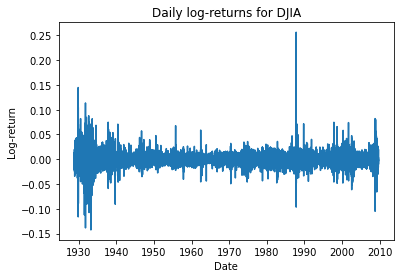

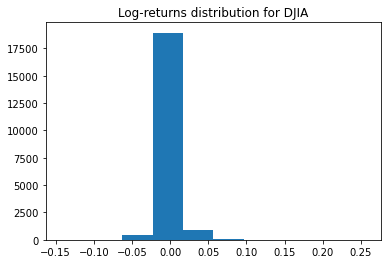

<Figure size 432x288 with 0 Axes>

Kormogorov-Smirnov test. H0: Log-returns follow a Normal distribution
KstestResult(statistic=0.09252277084685434, pvalue=7.1210698699353984e-152)


c,Pr(r<c)_empiric,Pr(r<c)_Normal
float64,float64,float64
-0.03,0.011918543496644143,0.00526934919592359
-0.06,0.001537750423732602,1.4422861209229582e-07
-0.12,9.839856332143242e-05,4.462240934680101e-25


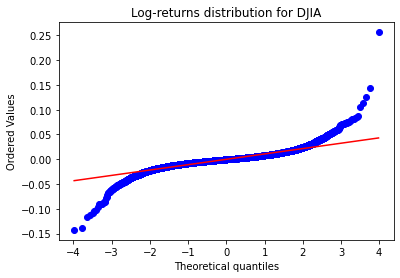

In [1]:
# This program tests the hypothesis that the DJIA log-returns are drawn from
# a Normal distribution and estimates the probability of extreme negative returns
#Author: Dragos Cioata
#Submitted: 04 Mar 2019

#import
import numpy.random as random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import pylab
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from astropy.table import Table


#read csv data
data=pd.read_csv('djia.csv', encoding='cp1252')
#make de column Date a datetime type
data['Date'] = pd.to_datetime(data['Date'])
#extract the year of the date
data['year']= data['Date'].dt.year
#keep only the 1987 year or bellow
#data=data[data['year']<=1987]

#make a empty list
logreturn=np.empty([int(len(data.index)),1])
#calculate the Log-price=log(price)
data['logprice']=np.log(data['Close'])
#calculate the log-return
for i in range(0,len(data.index)-1):
    #the formula is  logprice(t)=logprice(t-1)-logprice(t) where t is the time(year)
 logreturn[i]=np.array(data['logprice'][i+1:i+2])-np.array(data['logprice'][i:i+1])

data['logreturn']=logreturn

#drop the first element, because he dosent have a log return
data.drop(data.tail(1).index,inplace=True)

#plot log-returns
plt.figure(1)
plt.title('Daily log-returns for DJIA')
plt.plot(data['Date'],data['logreturn'])
plt.xlabel('Date')
plt.ylabel('Log-return')

#make log-return a dataframe
logreturn=pd.DataFrame(data['logreturn'])

#print  a descriptive statistics for log-return
print("Descriptive Statistics for log-return")
print(pd.concat([logreturn.describe(percentiles=[]),pd.DataFrame(logreturn.skew(), columns=["skewness"]).T,
                 pd.DataFrame(logreturn.kurtosis(), columns=["kurtosis"]).T]))

#print the quantiles for log-return
print("Quantiles of the log-returns distribution")
print(data['logreturn'].quantile([.0,.01,.05,.1,.25,0.5,.75,.9,.95,.99,1]))

#print the biggest 10 log-return
datalarger=data.nlargest(10, 'logreturn')
datalarger=datalarger[['logreturn','Date']]
print("Top 10 logreturn:")
print(datalarger.sort_values(by='logreturn'))

#print the littlest 10 log-return
datasmaller=data.nsmallest(10, 'logreturn')
datasmaller=datasmaller[['logreturn','Date']]
print("Last 10 logreturn")
print(datasmaller.sort_values(by='logreturn'))

plt.figure(2)
plt.title("Log-returns distribution for DJIA")
plt.hist(x=data['logreturn'])


plt.figure(3)
plt.show()


res = stats.probplot(data['logreturn'], plot=plt)
plt.title("Log-returns distribution for DJIA")
print("Kormogorov-Smirnov test. H0: Log-returns follow a Normal distribution")
print(scipy.stats.kstest(data['logreturn'],'norm',args=(data['logreturn'].mean(), data['logreturn'].std())))


i1=np.empty([int(len(data.index)),1])
i2=np.empty([int(len(data.index)),1])
i3=np.empty([int(len(data.index)),1])
for i in range(0,len(data.index)-1):
    if np.array(data['logreturn'][i:i+1])<-0.03:
        i1[i]=1
    else:
        i1[i]=0
    if np.array(data['logreturn'][i:i+1])<-0.06:
        i2[i]=1
    else:
        i2[i]=0
    if np.array(data['logreturn'][i:i + 1]) < -0.12:
        i3[i] = 1
    else:
        i3[i] = 0
data['i1']=i1
data['i2']=i2
data['i3']=i3
mu=data['logreturn'].mean()
sigma=data['logreturn'].std()
p1=data['i1'].mean()
p2=data['i2'].mean()
p3=data['i3'].mean()
p11=np.array(norm(mu,sigma).cdf(-0.03))
p22=np.array(norm(mu,sigma).cdf(-0.06))
p33=np.array(norm(mu,sigma).cdf(-0.12))
 
#Probability of extreme negative returns;
a = [-0.03, -0.06, -0.12]
b = [p1, p2, p3]
c = [p11, p22, p33]
t = Table([a, b, c], names=('c', 'Pr(r<c)_empiric', 'Pr(r<c)_Normal'))
t
